In [1]:
# import library
import numpy as np 
import pandas as pd 

In [2]:
# load data
dataset = pd.read_csv('hotel_bookings.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [3]:
# hotel
dataset['hotel'].describe()

count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object

In [4]:
# lead_time
dataset['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [5]:
# arrival_date_year
dataset['arrival_date_year'].describe()

count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64

In [6]:
# arrival_date_month
dataset['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

In [7]:
# arrival_date_week_number
# dataset['arrival_date_week_number'] = dataset['arrival_date_week_number'].astype(str)
dataset['arrival_date_week_number'].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [8]:
# arrival_date_day_of_month
dataset['arrival_date_day_of_month'].describe()

count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64

In [9]:
# stays_in_weekend_nights
dataset['stays_in_weekend_nights'].describe()

count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64

In [40]:
# stays_in_week_nights
dataset['stays_in_week_nights'].describe()

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

## Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.set(style='darkgrid')

<Figure size 1440x720 with 0 Axes>

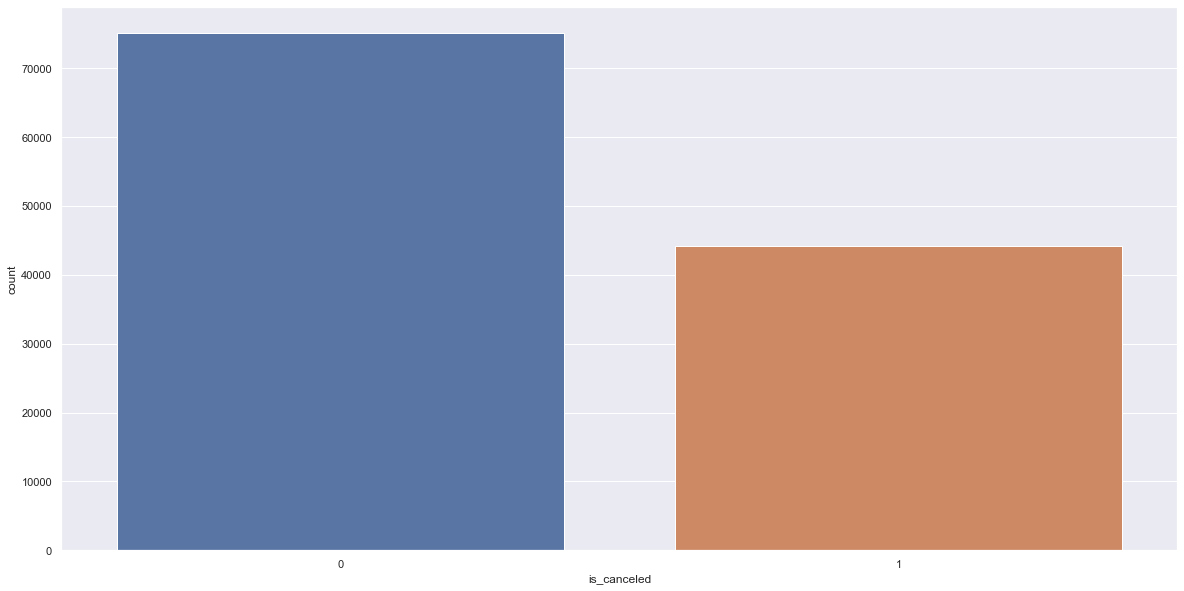

In [11]:
# The label - is_canceled
plt.figure(figsize = (20,10))
sns.countplot(dataset['is_canceled'])

- It seems that the majority of reservations were not canceled

<Figure size 1440x720 with 0 Axes>

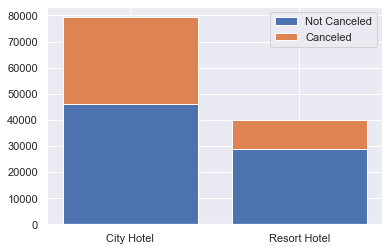

<Figure size 1440x720 with 0 Axes>

In [12]:
# Stacked Bar chart for hotel
plt.figure(figsize = (20,10))

canceled = dataset[dataset.is_canceled==1]['hotel'].value_counts()
not_canceled = dataset[dataset.is_canceled==0]['hotel'].value_counts()

labels = ['City Hotel', 'Resort Hotel']
fig, ax = plt.subplots()
plt.figure(figsize = (20,10))
ax.bar(labels, not_canceled, label='Not Canceled')
ax.bar(labels, canceled, bottom=not_canceled, label='Canceled')

ax.legend()
plt.show()

- City Hotel has more bookings (3/4 of bookings), any maybe that's why it has more cancellations.
- City Hotel has more bookings because it is more affordable
#### Resort Hotel is more appropriate for larger group of customers (family with childern)??  -- need to find out the relation.

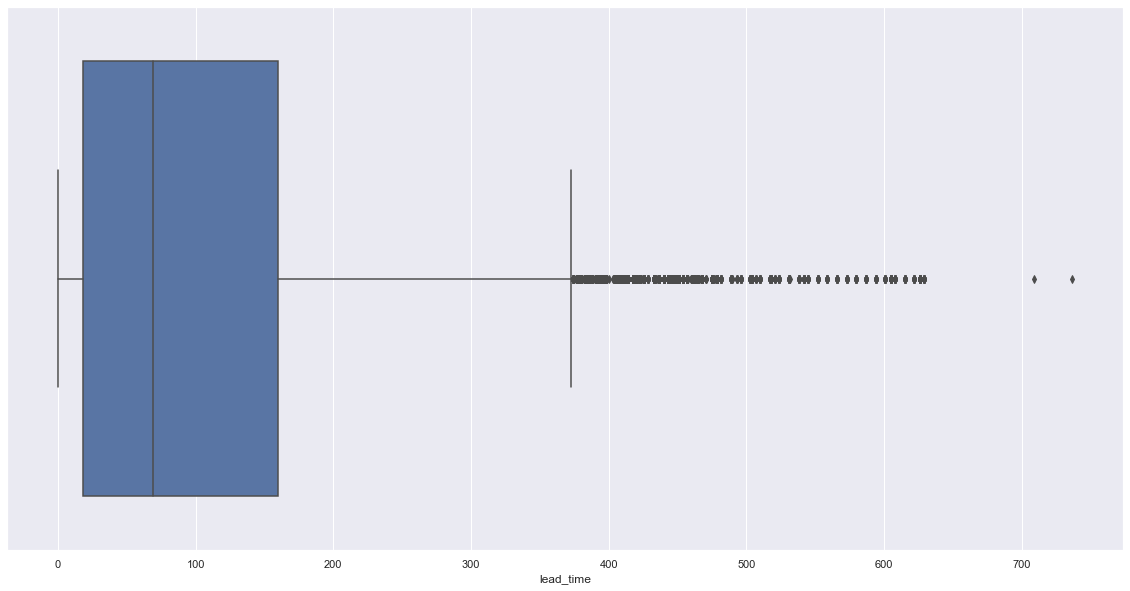

In [13]:
# boxplot for lead time and for lead time
plt.figure(figsize = (20,10))
sns.boxplot(dataset['lead_time'])

- The outliers are those larger than ~370
- The majority are smaller than 200

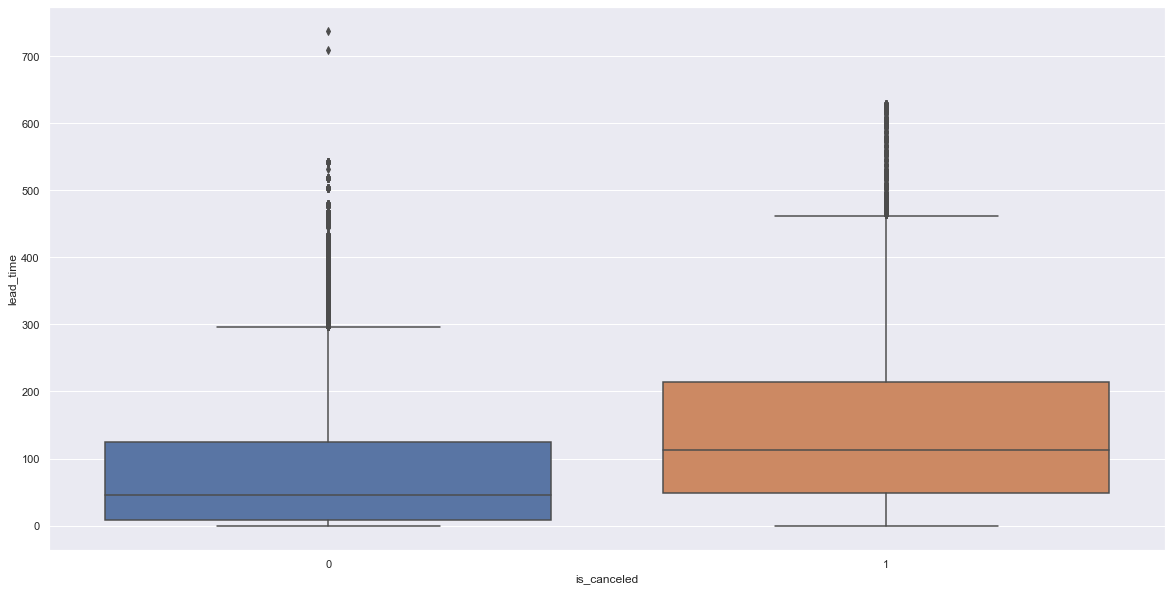

In [14]:
# boxplot for lead time and for lead time reagarding to is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['is_canceled'],y=dataset['lead_time'])

- Bookings tend to be canceled when the lead time is longer

<Figure size 1440x720 with 0 Axes>

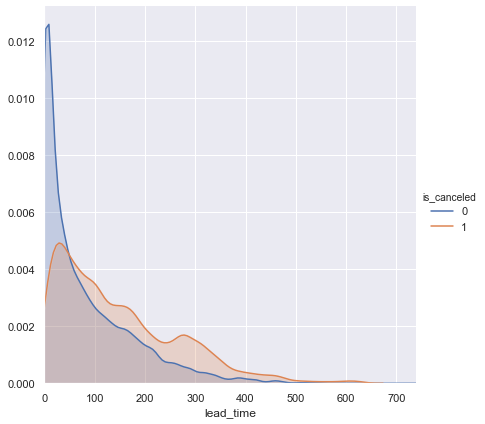

In [15]:
# Density Curve for lead time by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(dataset,hue='is_canceled',height=6,xlim=[0,740]).map(sns.kdeplot,'lead_time',shade=True).add_legend()

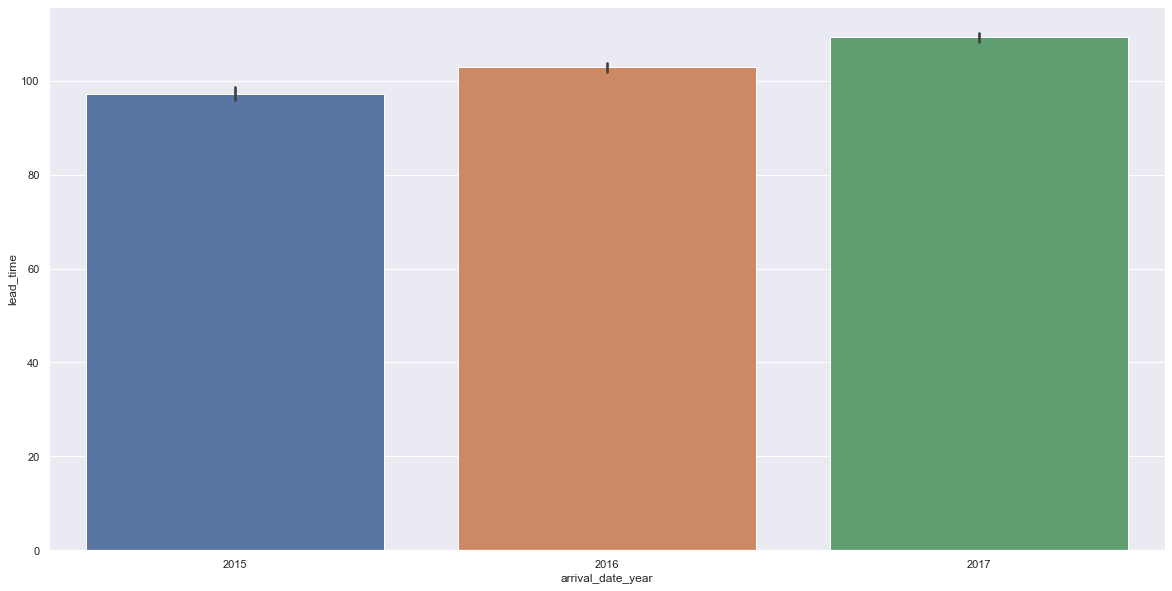

In [16]:
# bar chart for lead time with regard to arrival year
plt.figure(figsize = (20,10))
sns.barplot(x ='arrival_date_year', y = 'lead_time', data = dataset)

- When the lead time is larger than 60, people tend to cancel their bookings

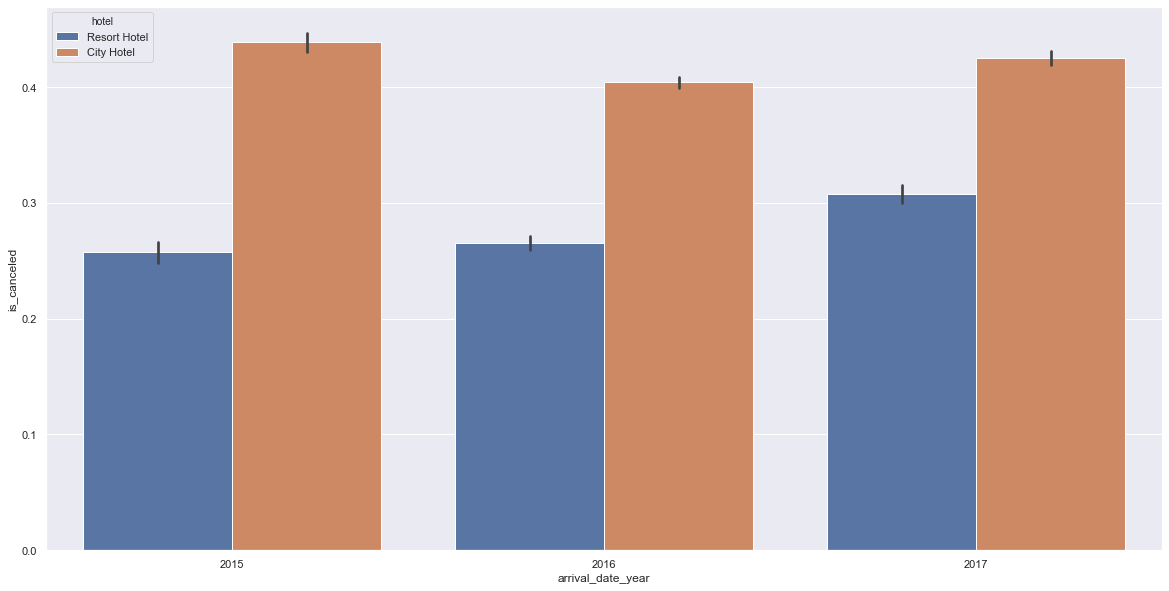

In [17]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='arrival_date_year', y='is_canceled', hue='hotel',data=dataset)

- 2016 has more reservations, but the overall cancellation rates among three years are approximately the same

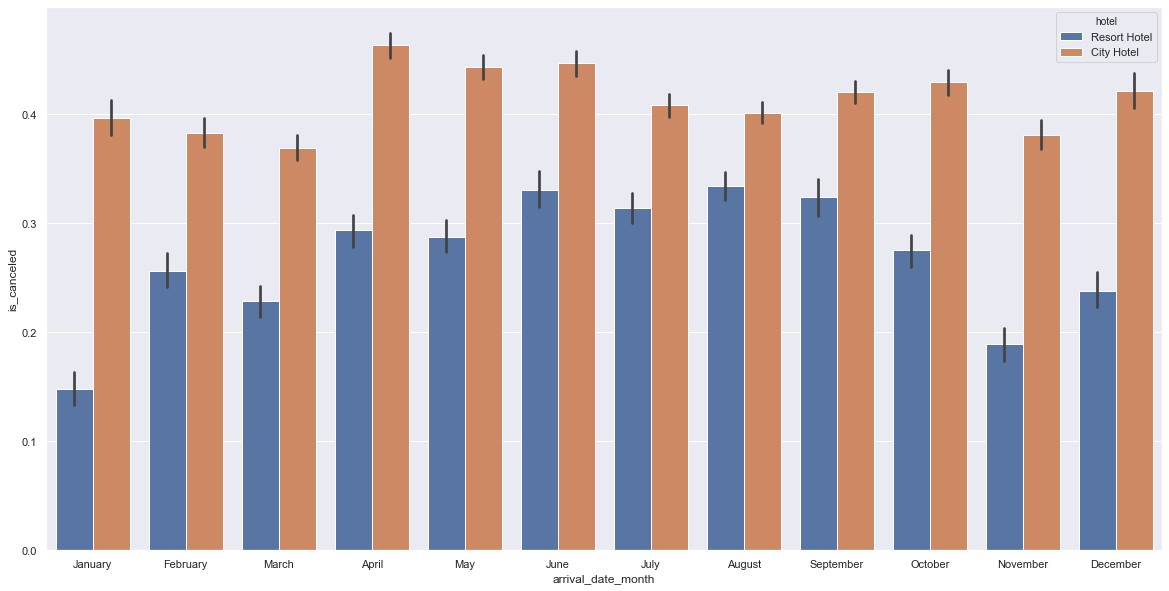

In [18]:
# Bar chart for arrival month
plt.figure(figsize = (20,10))
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
       'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data=dataset, order=month)

- Increasing more bookings arond the middle of the year (summer period is the peak)

<Figure size 1440x720 with 0 Axes>

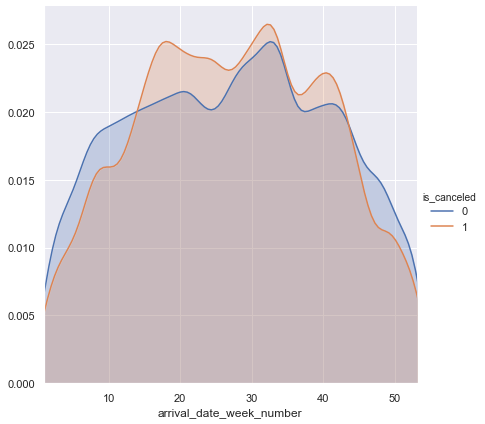

In [19]:
# Density Curve for arrival week number by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(dataset, hue = 'is_canceled',height = 6, xlim=[1,53]).map(sns.kdeplot, 'arrival_date_week_number',shade=True).add_legend()

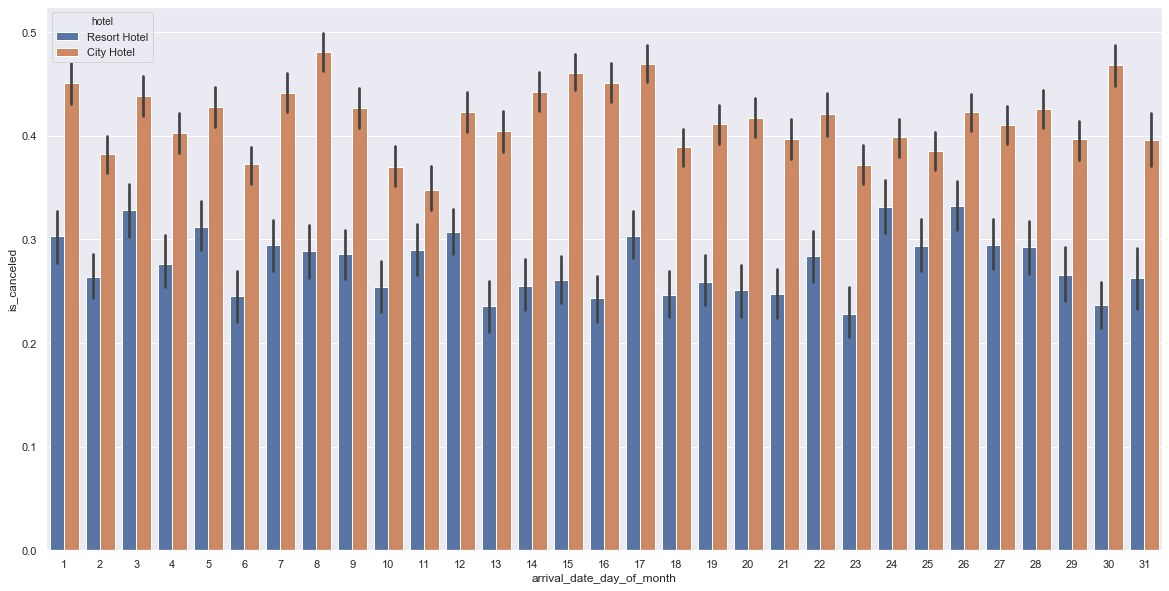

In [20]:
# bar chart for arrival date of month
plt.figure(figsize=(20,10))
sns.barplot(x='arrival_date_day_of_month', y='is_canceled', hue='hotel',data=dataset)

- flucutations for the arrival day of month.

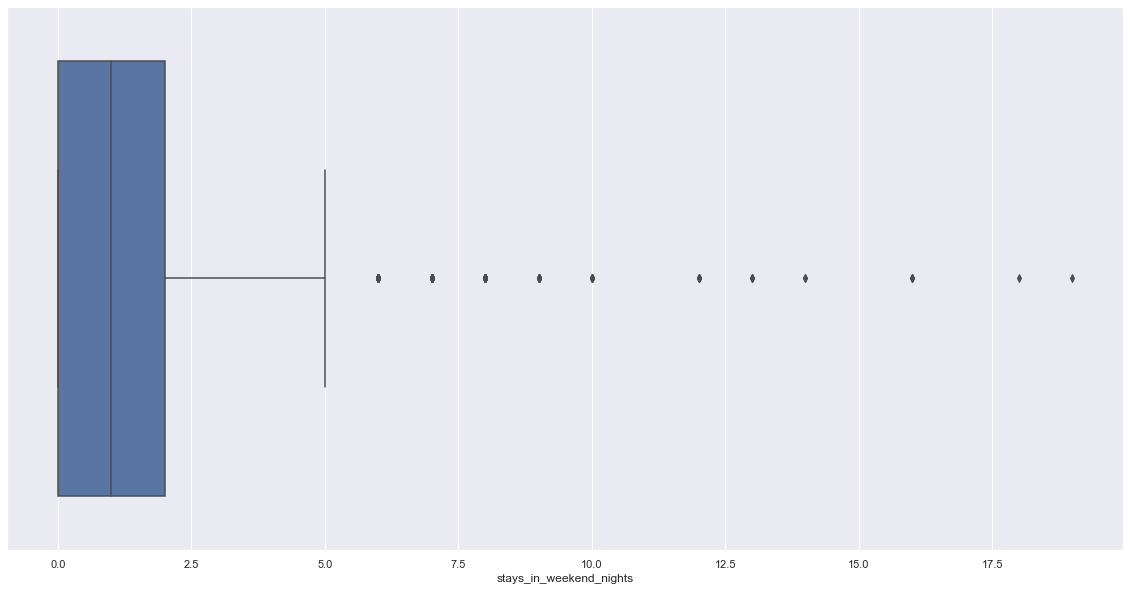

In [21]:
# box plot of stays on weekend nights
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['stays_in_weekend_nights'])

- outlikers are larger than 5
- majority is smaller than 2.5 days (i.e. around one weekend)

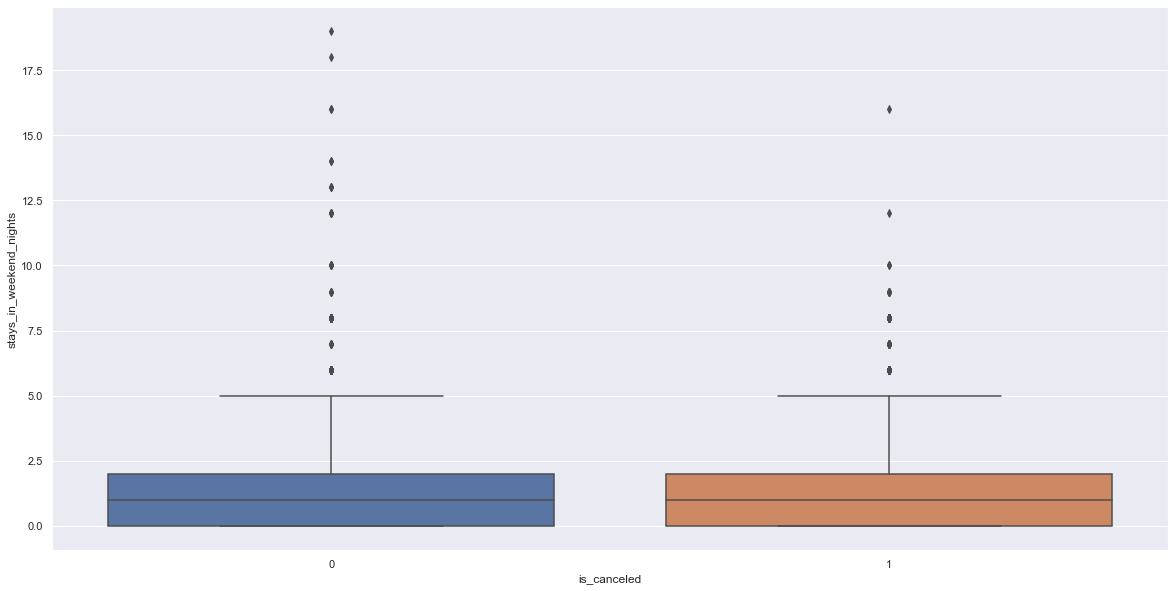

In [22]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['is_canceled'],y=dataset['stays_in_weekend_nights'])

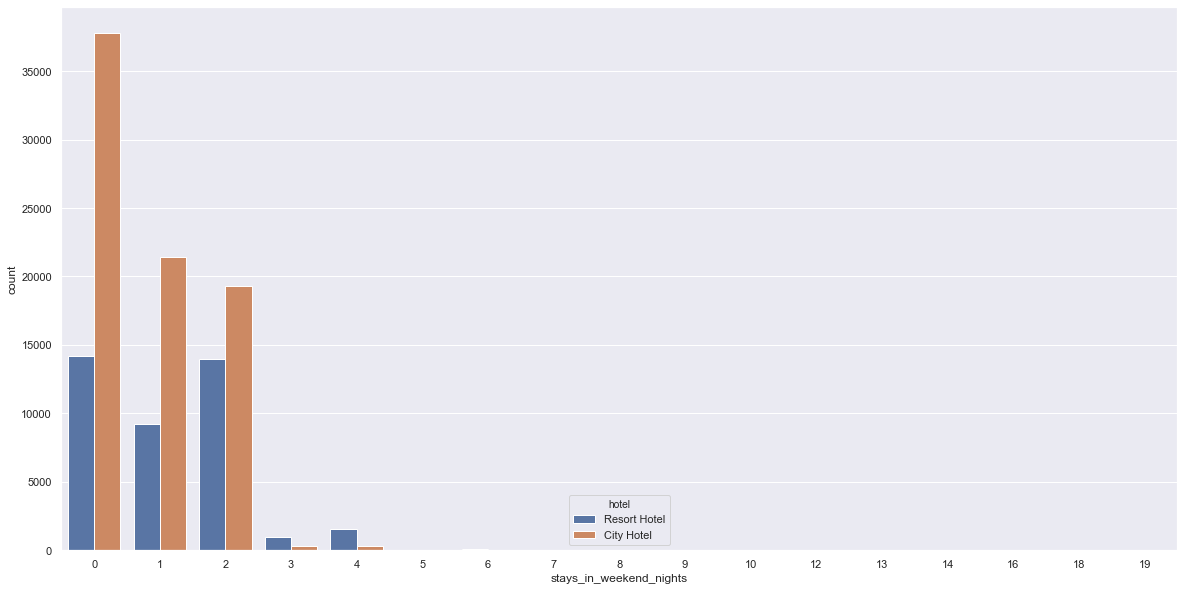

In [23]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=dataset)

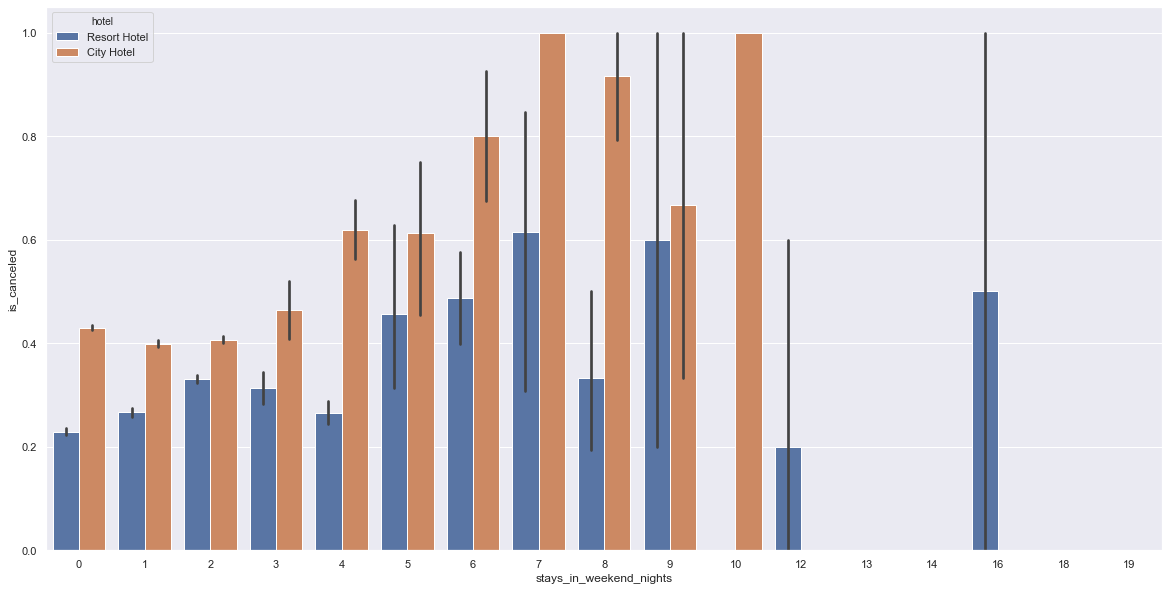

In [24]:
# bar chart for stays on weekend nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_weekend_nights', y='is_canceled', hue='hotel', data=dataset)

- The cancellation rates tend to increase as the increase in weekend nights

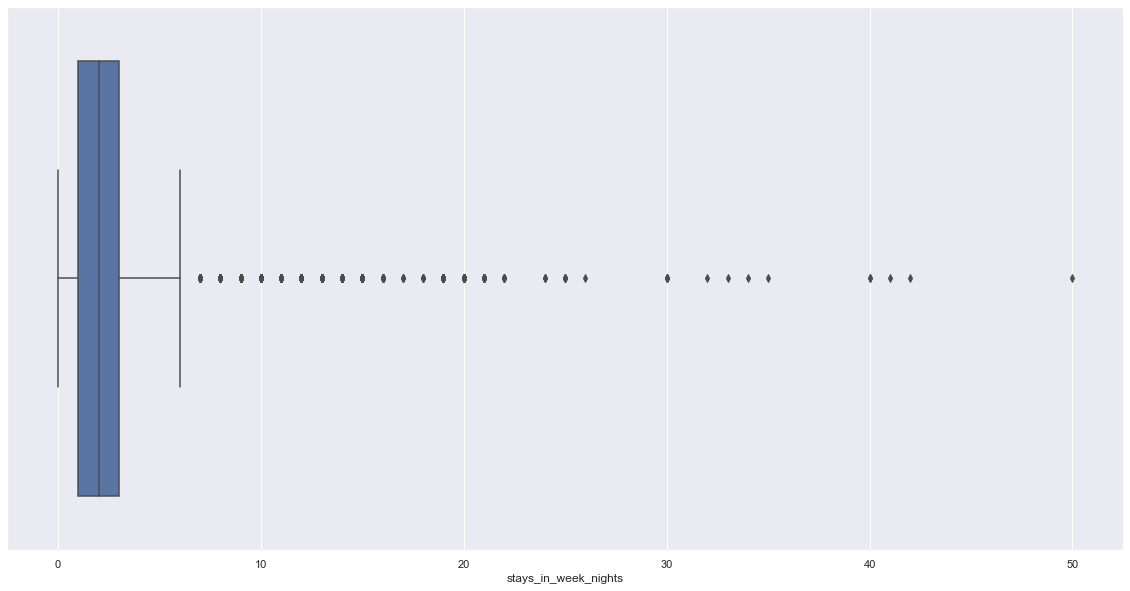

In [42]:
# box plot of stays on week nights
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['stays_in_week_nights'])

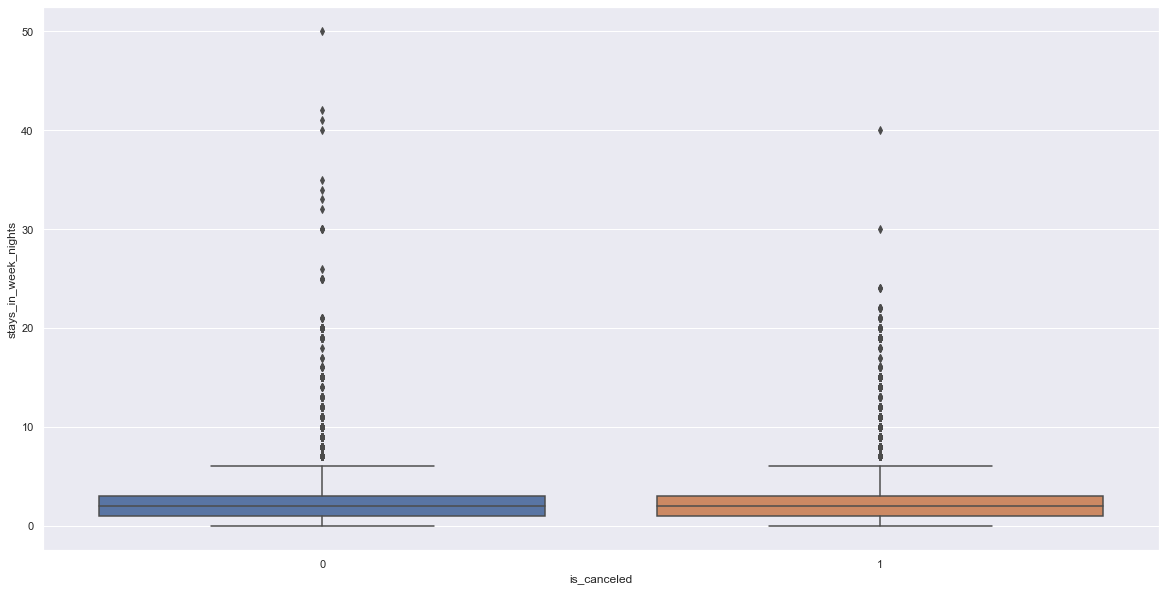

In [46]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['is_canceled'],y=dataset['stays_in_week_nights'])

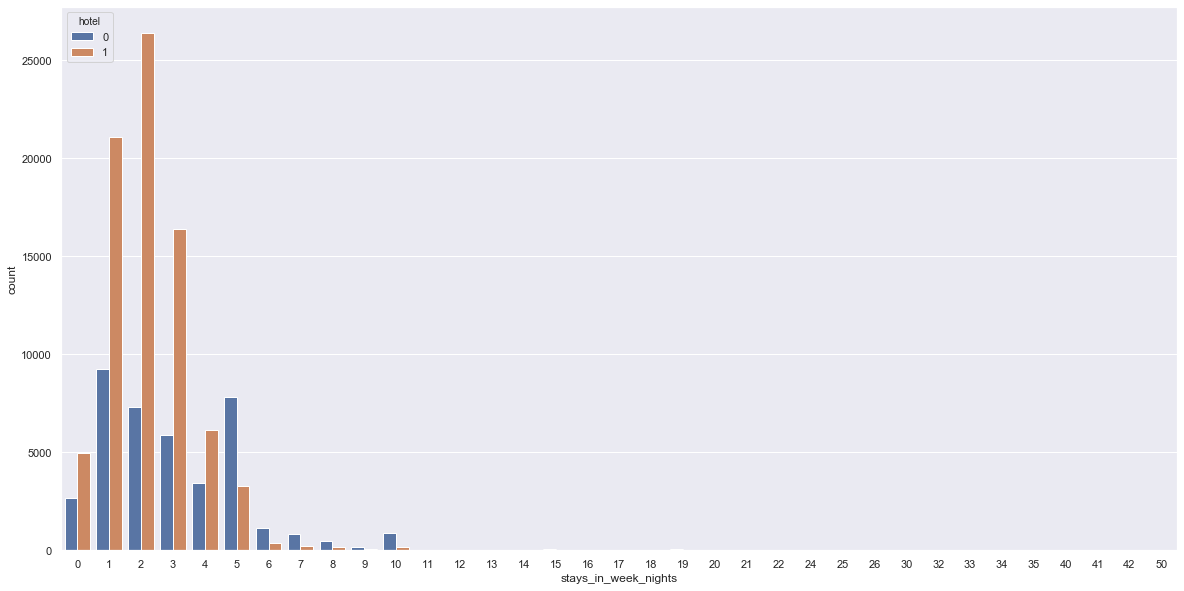

In [43]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_week_nights', hue='hotel', data=dataset)

- from the above 3 graphs we can see the majority of people are staying for around 0~5 week nights.

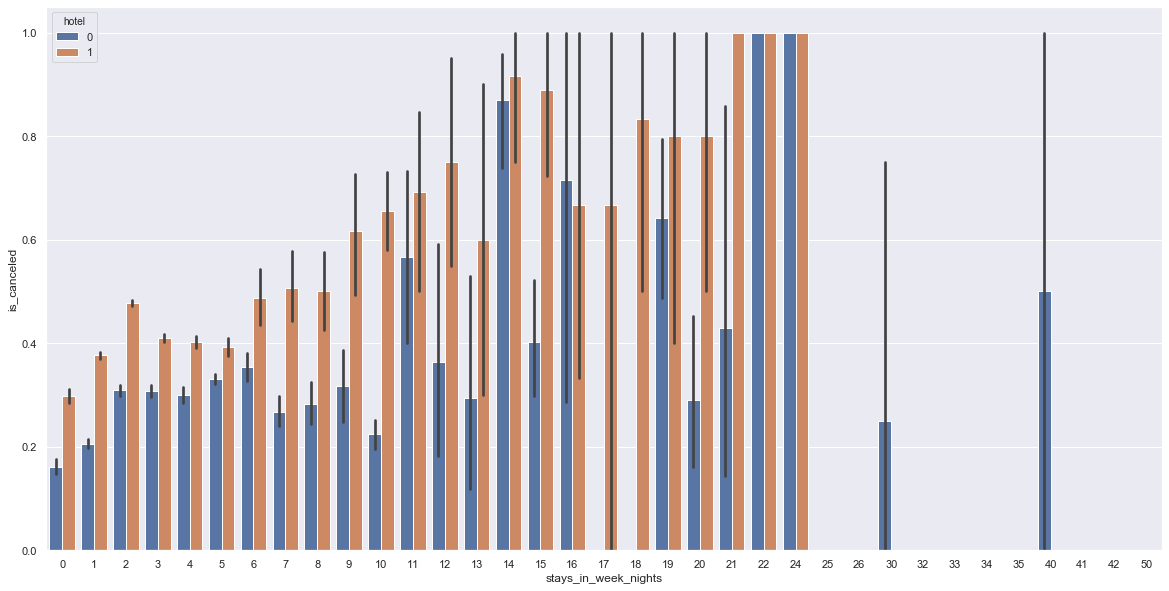

In [45]:
# bar chart for stays on week nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_week_nights', y='is_canceled', hue='hotel', data=dataset)

- same as the weekend nights, the longer the weekday nights, the higher chance the reservation will be cancelled

## Feature Engineering

In [26]:
# to check the feature types
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Handling categorical features

In [27]:
# change hotels to 0 and 1 (City Hotel: 1, Resort Hotel: 0)
dataset['hotel'] = dataset.hotel.replace(['Resort Hotel','City Hotel'],[0,1])

In [28]:
# change arrival date month to 1 to 12
dataset['arrival_date_month'] = dataset.arrival_date_month.replace(month,np.arange(1,13))

In [29]:
# group months into seasons
spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]
winter = [1,2,12]
dataset['seasons'] = dataset['arrival_date_month'].map(lambda i: "spring" if i in spring else "summer" if i in summer else "fall" if i in fall else "winter")

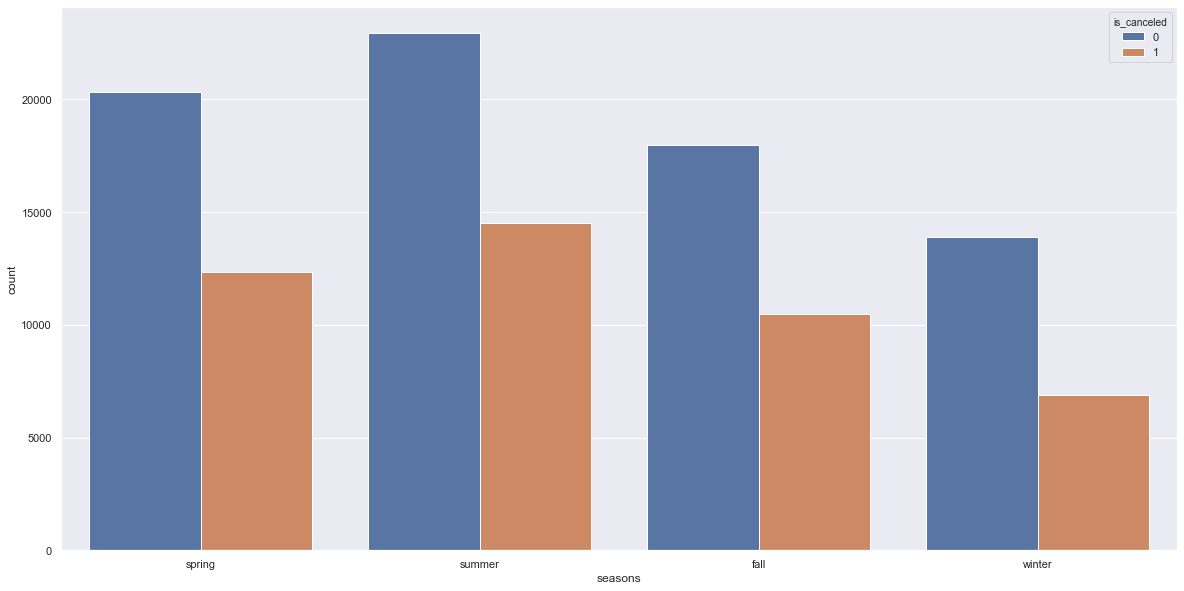

In [31]:
# bar chart for seasons
plt.figure(figsize=(20,10))
seasons = ['spring','summer','fall','winter']
sns.countplot(x = 'seasons', hue = 'is_canceled', data=dataset, order=seasons)

In [32]:
# create one-hot variavles for seasons
season_dummies = pd.get_dummies(dataset['seasons'])

# adding dummy variables into the dataset
dataset = pd.concat([dataset, season_dummies],axis=1,sort=True)

# drop the season column after adding the dummies
dataset = dataset.drop(columns=['seasons'])

### Optional: Data transformation and handle outliers

In [33]:
# lead time
dataset['lead_time'].skew()

1.3465498727254268

In [34]:
dataset['log_lead'] = dataset['lead_time'].map(lambda i: np.log(i) if i > 0 else 0)
dataset['log_lead'].skew()

-0.903993835862541

Perform `log( )` function on each lead time to scale the data.
#### After outliers handling

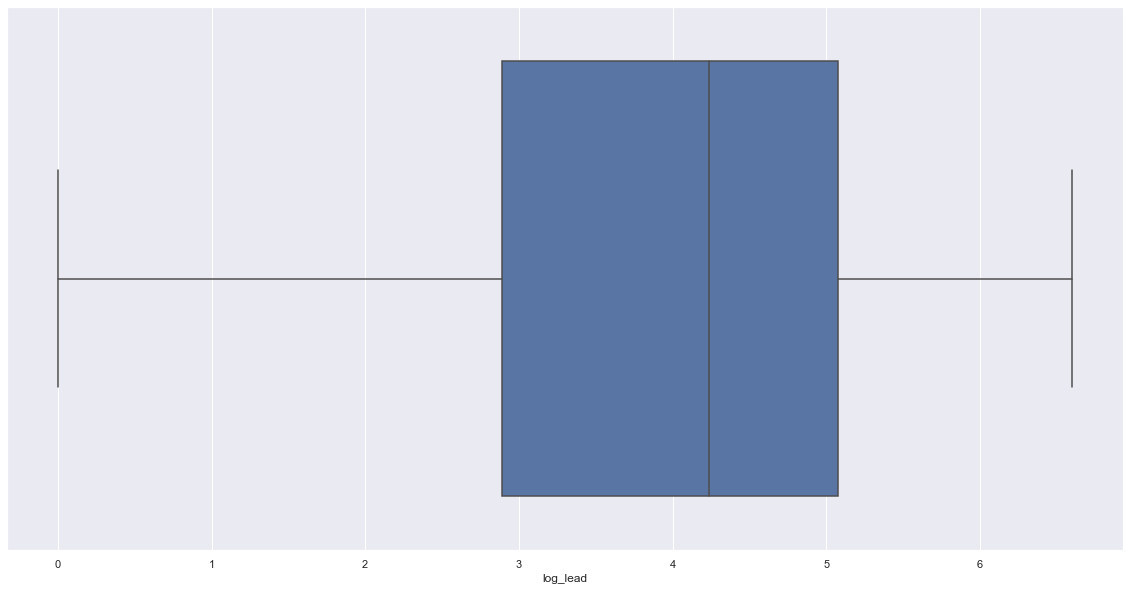

In [35]:
plt.figure(figsize = (20,10))
sns.boxplot(dataset['log_lead'])

In [36]:
# stays_in_weekend_nights
dataset['stays_in_weekend_nights'] = np.where(dataset['stays_in_weekend_nights'] > 5, 5, dataset['stays_in_weekend_nights'])

Data clipping: for each `stays_in_weekend_nights`, if it is larger than 5, change it to 5.
#### After outliers handling:

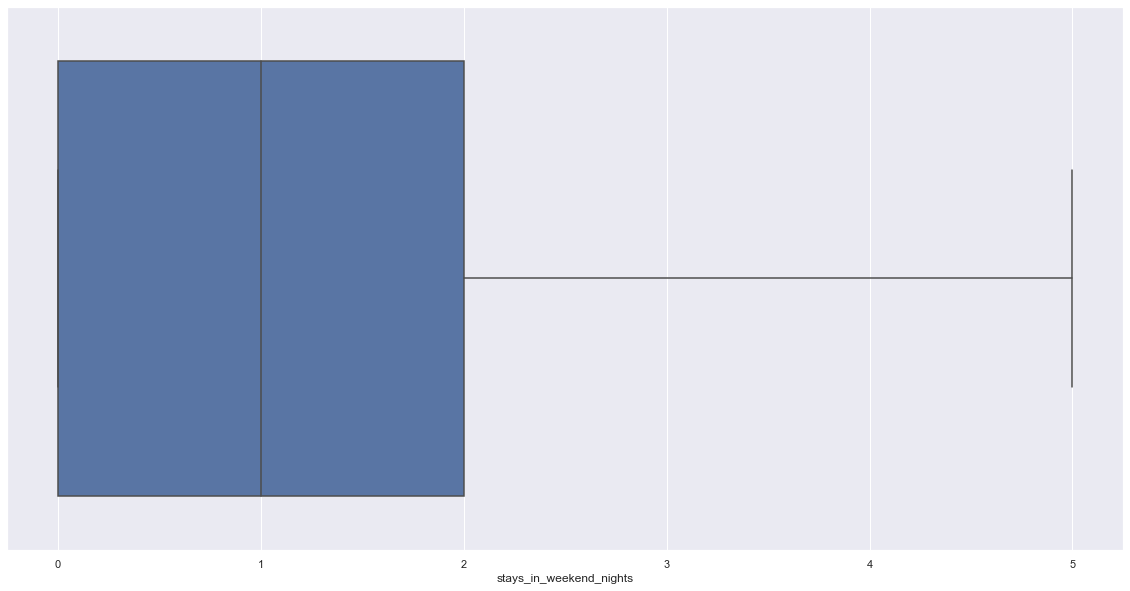

In [37]:
plt.figure(figsize = (20,10))
sns.boxplot(dataset['stays_in_weekend_nights'])

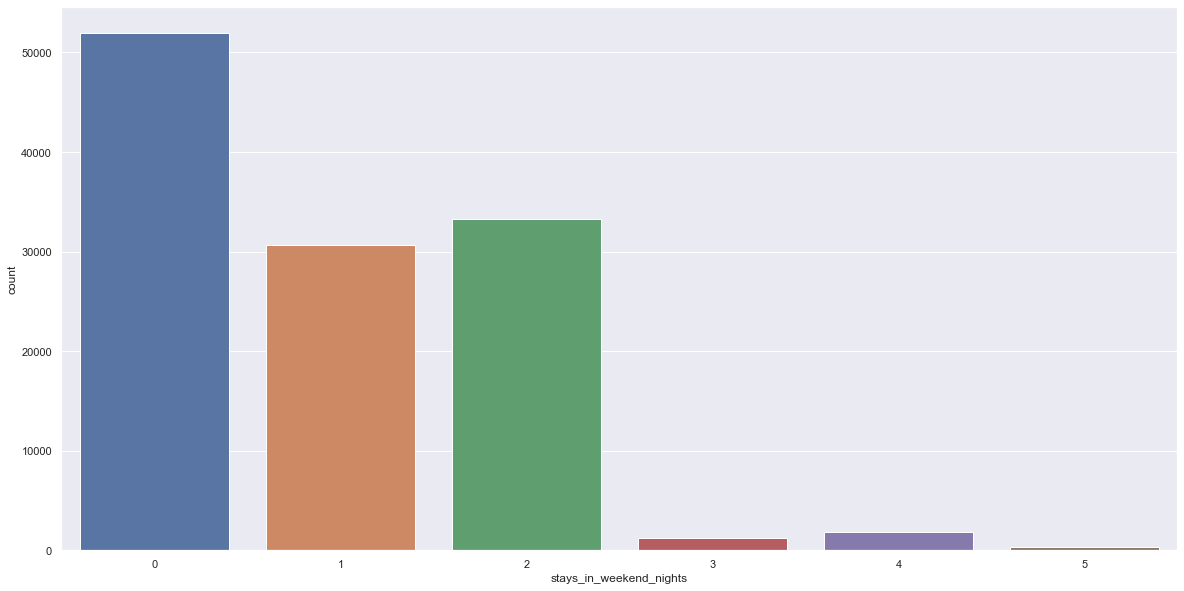

In [38]:
plt.figure(figsize = (20,10))
sns.countplot(dataset['stays_in_weekend_nights'])

In [52]:
# stays_in_week_nights
dataset['stays_in_week_nights'] = np.where(dataset['stays_in_week_nights'] > 6, 6, dataset['stays_in_week_nights'])

Data clipping: for each `stays_in_weekend_nights`, if it is larger than 5, change it to 5.
#### After outliers handling:

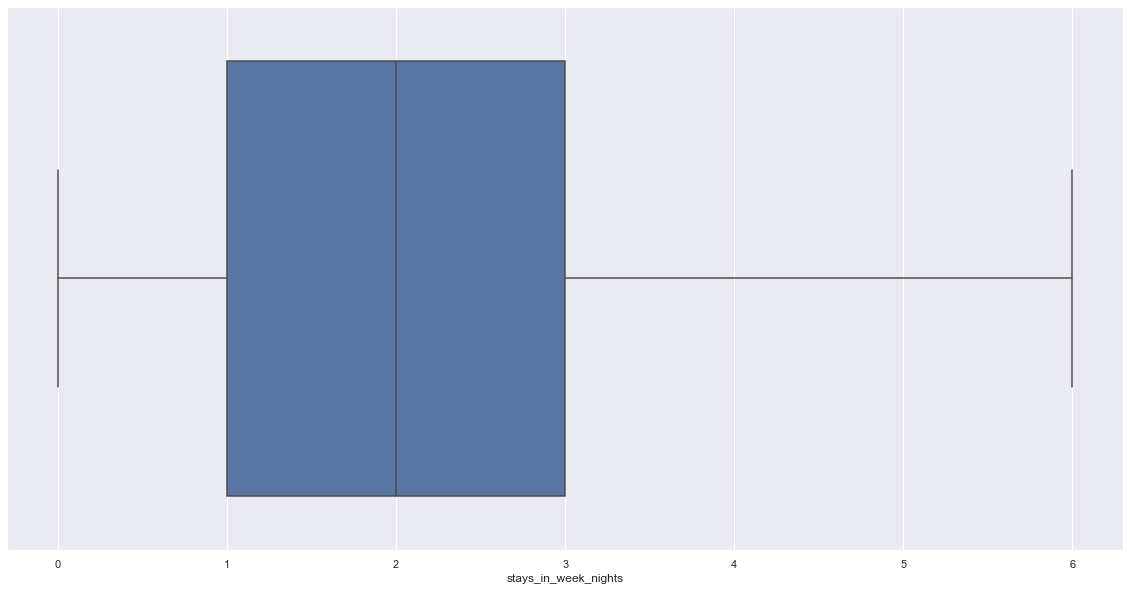

In [53]:
plt.figure(figsize = (20,10))
sns.boxplot(dataset['stays_in_week_nights'])

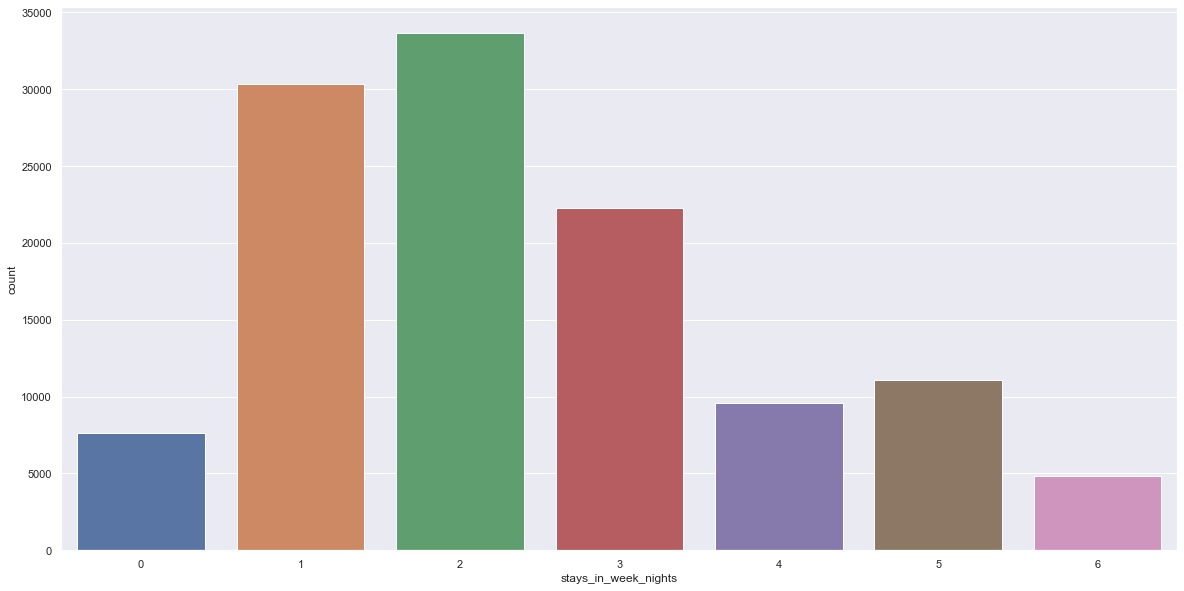

In [54]:
plt.figure(figsize = (20,10))
sns.countplot(dataset['stays_in_week_nights'])

In [59]:
# create a column indicates the total nights each customers stay
dataset['stays_in_total_nights'] = dataset['stays_in_weekend_nights'] + dataset['stays_in_week_nights']

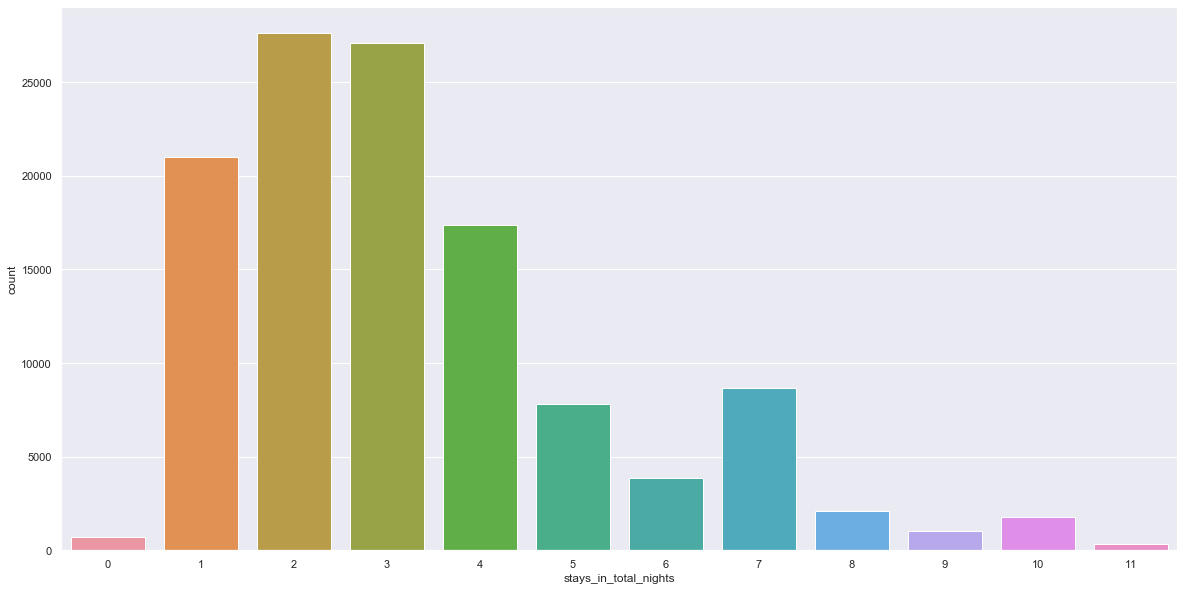

In [65]:
plt.figure(figsize = (20,10))
sns.countplot(dataset['stays_in_total_nights'])

### Dropping out unrelated features

In [ ]:
# drop out 'arrival_date_day_of_month' since it looks random
dataset = dataset.drop(columns=['arrival_date_day_of_month','reservation_status','reservation_status_date'])

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 38 columns):
hotel                             119390 non-null int64
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null int64
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non

In [ ]:
# export the clean dataset to a new csv file
dataset.to_csv("clean_dataset.csv")

## Correlations (after feature engineering)

In [ ]:
# look at the correlations among columns
data = dataset.copy()
data.corr()

In [ ]:
# look at the correlations with is_canceled
data.corr()['is_canceled'].sort_values()